In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path = list(set(sys.path))

from common.evaluate import make_vis_env, test_env

from flow.multiagent_envs import MultiWaveAttenuationMergePOEnv
from flow.scenarios import MergeScenario
from flow.utils.registry import make_create_env

benchmark_name = 'multi_merge'

In [2]:
benchmark = __import__(
    "flow.benchmarks.%s" % benchmark_name, fromlist=["flow_params"])
flow_params = benchmark.flow_params
HORIZON = flow_params['env'].horizon

def make_env(create_env):
    def _thunk():
        env = create_env()
        return env
    return _thunk

create_env, env_name = make_create_env(params=flow_params, version=0)

In [3]:
env = create_env()
env.reset()

{}

In [3]:
env = make_vis_env(flow_params, MultiWaveAttenuationMergePOEnv, MergeScenario)
env.reset()

{}

In [12]:
for _ in range(5):
    ids = env.k.vehicle.get_rl_ids()
    actions = {}
    for id_ in ids:
        actions.update({id_: 1.})
    s, r, done, _ = env.step(actions)

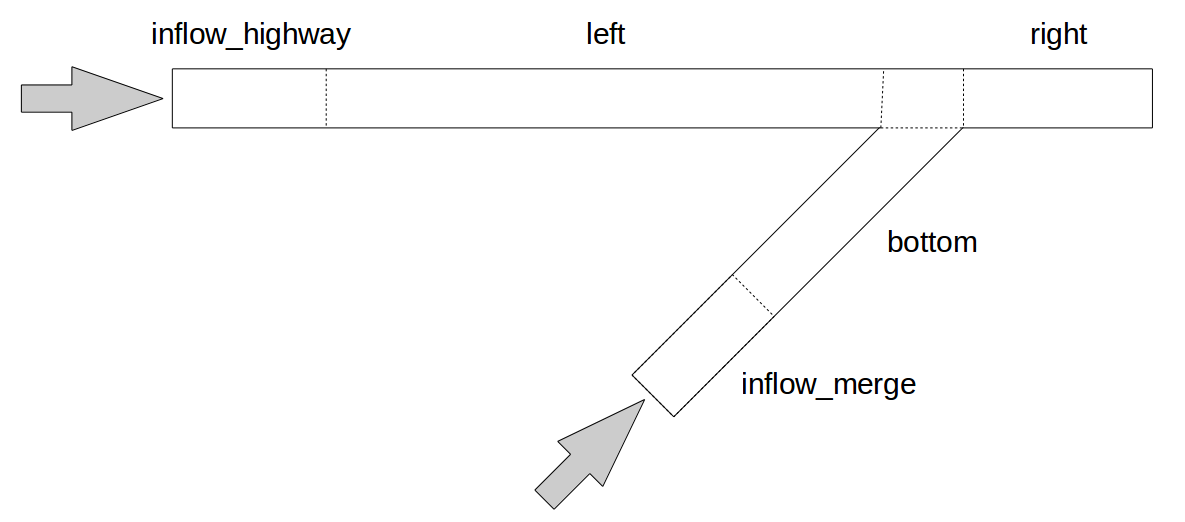

The merge scenario is like above. In the current benchmark merge scenario, 'right' in the above image is 'center'.

In [5]:
env.k.scenario.get_edge_list()

['left', 'center', 'inflow_highway', 'inflow_merge', 'bottom']

In [48]:
# calculate the space-time velocity map
ids = env.k.vehicle.get_ids()
left_length = env.k.scenario.edge_length('left')
car_length = 5.0
scale = 10
vel_map = np.zeros(int(left_length)*scale)
for id_ in ids:
    if env.k.vehicle.get_edge(id_) == 'left':
        pos = np.round(env.k.vehicle.get_position(id_), decimals=1)
        vel = env.k.vehicle.get_speed(id_)
        print('vehicle position: {}'.format(pos))
        print('vehicle velocity: {}'.format(vel))
        
        pos_bottom = max(0, int((pos-car_length/2.0)*scale))
        pos_top = min(int(left_length)*scale, int((pos+car_length/2.0)*scale))
        vel_map[pos_bottom:pos_top] += vel

vehicle position: 117.1
vehicle velocity: 5.5724513531791935
vehicle position: 316.6
vehicle velocity: 5.4483259471167464
vehicle position: 517.0
vehicle velocity: 5.63419162037078
